<a href="https://colab.research.google.com/github/courage-the-cowardlydog/TODO/blob/main/Copy_of_minipaniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Open file picker
uploaded = files.upload()

# Get the first uploaded file's name
file_name = next(iter(uploaded))

# Read the CSV
df = pd.read_csv(file_name)

# Display the first 5 rows
print(df.head())


Saving dataset_phishing.csv to dataset_phishing.csv
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_reg

In [ ]:
import pandas as pd
from google.colab import files

# Step 1: Upload CSV
uploaded = files.upload()
file_name = next(iter(uploaded))

# Step 2: Read CSV into DataFrame
df = pd.read_csv(file_name)

# Step 3: Basic Operations
print("=== First 5 Rows ===")
print(df.head(), "\n")

print("=== Last 5 Rows ===")
print(df.tail(), "\n")

print("=== Column Names ===")
print(df.columns.tolist(), "\n")

print("=== Shape of Dataset ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("=== Data Types ===")
print(df.dtypes, "\n")

print("=== Summary Statistics ===")
print(df.describe(), "\n")

print("=== Missing Values Count ===")
print(df.isnull().sum(), "\n")

# Step 4: Example - Selecting a column
if len(df.columns) > 0:
    col = df.columns[0]
    print(f"=== First 10 values of column '{col}' ===")
    print(df[col].head(10))


Saving dataset_phishing.csv to dataset_phishing (1).csv
=== First 5 Rows ===
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

/tmp/ipython-input-919152037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='coolwarm')


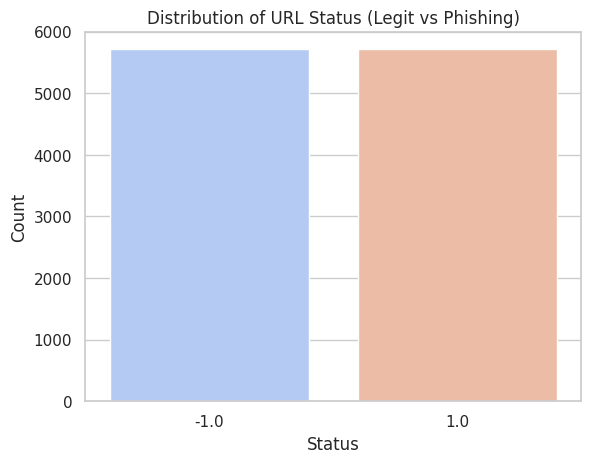

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='status', data=df, palette='coolwarm')
plt.title('Distribution of URL Status (Legit vs Phishing)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


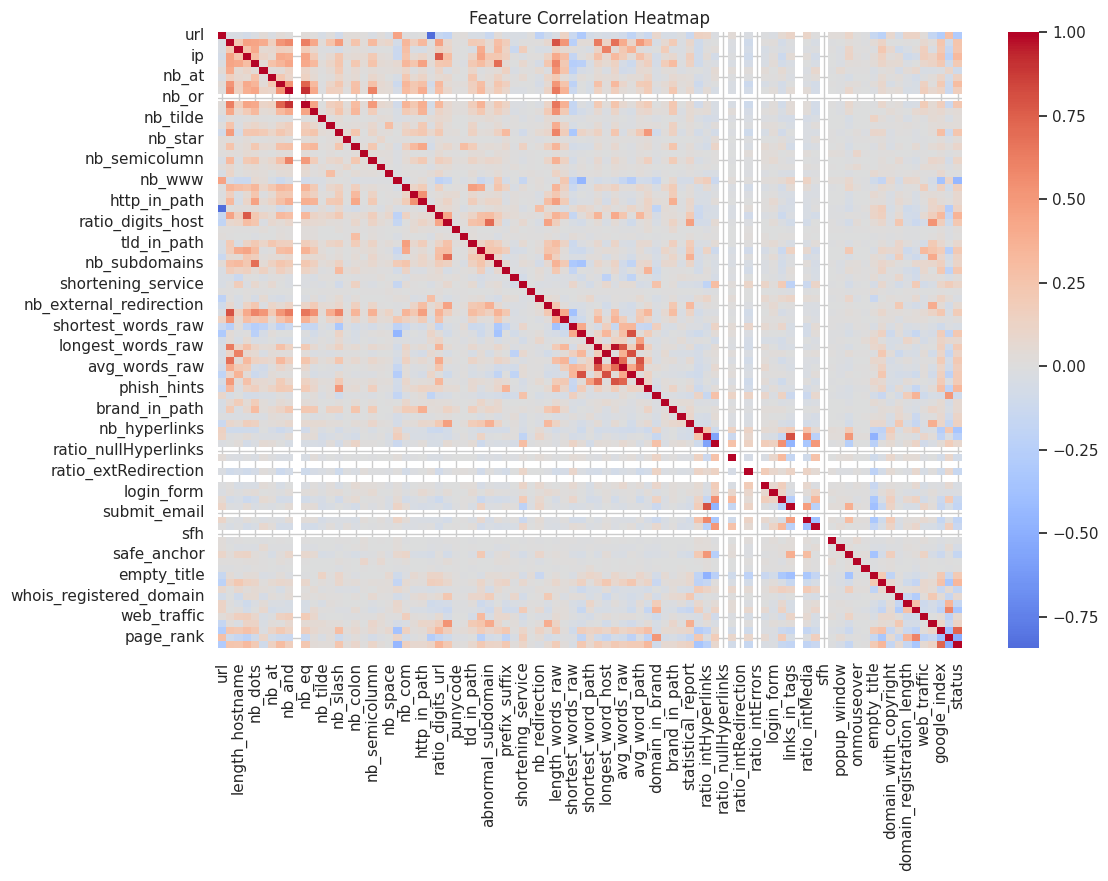

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


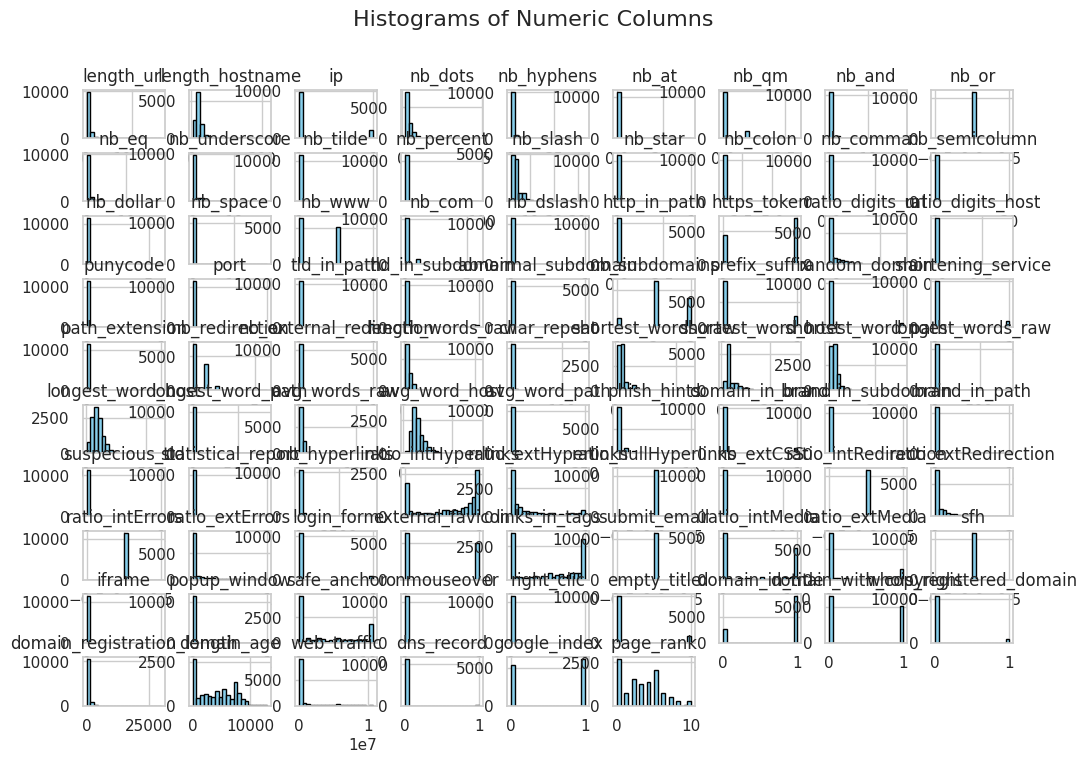

In [ ]:
# 2. Histogram for Each Numeric Column
df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.show()

In [ ]:
# Handle missing values (example: fill with mean for numeric columns)
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with mode (most frequent value)
for col in df.select_dtypes(exclude=['number']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

# Fix data types if needed
# Example: Convert a column to datetime
# df['date_column'] = pd.to_datetime(df['date_column'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns (example: ID column)
# df = df.drop(['ID'], axis=1)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(exclude=['number']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])


In [ ]:
from tabulate import tabulate
import io
print("## Dataset Info ##")
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
print("\n", info_str)

formatted_lines = [line.split() for line in info_str.split("\n") if line.strip()]
print(tabulate(formatted_lines, tablefmt="fancy_grid"))

## Dataset Info ##

 <class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  float64
 1   length_url                  11430 non-null  float64
 2   length_hostname             11430 non-null  float64
 3   ip                          11430 non-null  float64
 4   nb_dots                     11430 non-null  float64
 5   nb_hyphens                  11430 non-null  float64
 6   nb_at                       11430 non-null  float64
 7   nb_qm                       11430 non-null  float64
 8   nb_and                      11430 non-null  float64
 9   nb_or                       11430 non-null  float64
 10  nb_eq                       11430 non-null  float64
 11  nb_underscore               11430 non-null  float64
 12  nb_tilde                    11430 non-null  float64
 13  nb_percent

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print("\nMissing Data:\n", missing_data)


Missing Data:
 url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


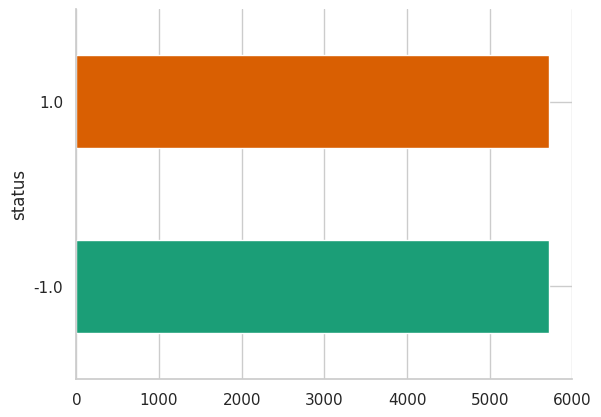

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

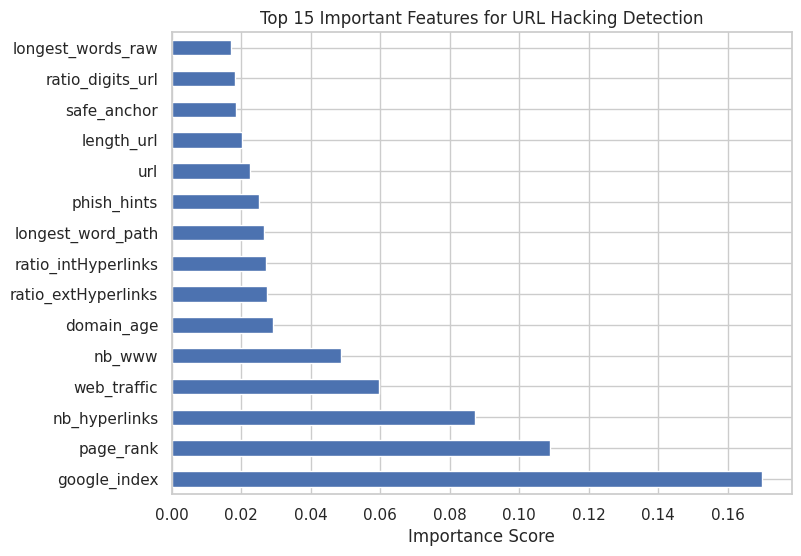

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('status', axis=1)
y = df['status']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(15)

top_features.plot(kind='barh', figsize=(8,6))
plt.title('Top 15 Important Features for URL Hacking Detection')
plt.xlabel('Importance Score')
plt.show()


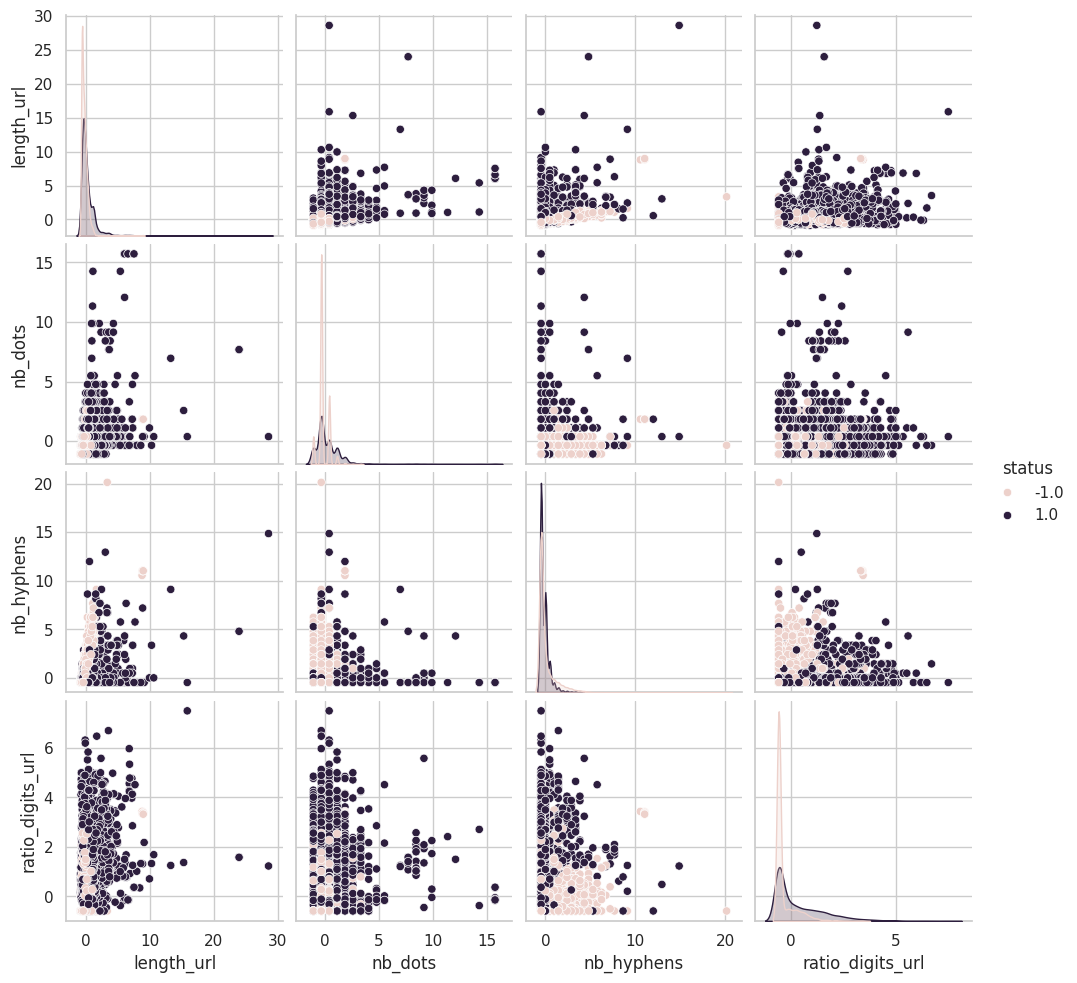

In [ ]:
sns.pairplot(df[['length_url', 'nb_dots', 'nb_hyphens', 'ratio_digits_url', 'status']], hue='status')
plt.show()


In [ ]:
target_corr = corr['status'].sort_values(ascending=False)
print(target_corr.head(15))


status                1.000000
google_index          0.731171
ratio_digits_url      0.356395
domain_in_title       0.342807
phish_hints           0.335393
ip                    0.321698
nb_qm                 0.294319
length_url            0.248580
nb_slash              0.242270
length_hostname       0.238322
nb_eq                 0.233386
ratio_digits_host     0.224335
shortest_word_host    0.223084
prefix_suffix         0.214681
longest_word_path     0.212709
Name: status, dtype: float64


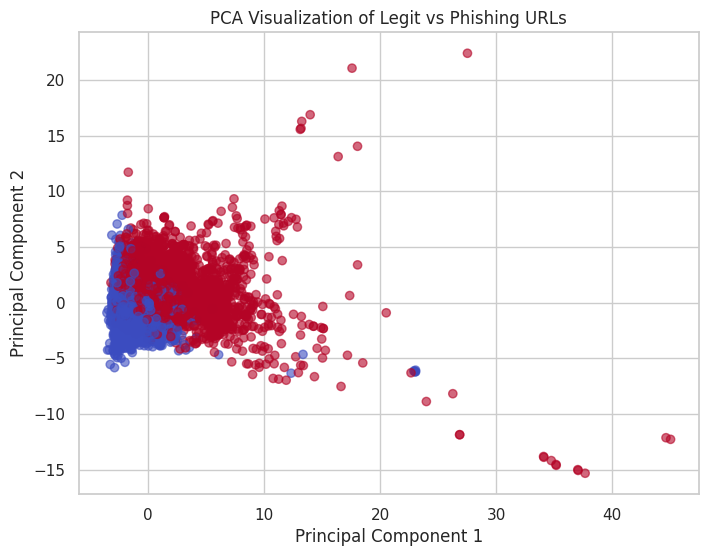

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('PCA Visualization of Legit vs Phishing URLs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
X = df.drop('status', axis=1)
y = df['status']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [ ]:
results = []

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)



==== Logistic Regression ====
              precision    recall  f1-score   support

        -1.0       0.93      0.94      0.94      1143
         1.0       0.94      0.93      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



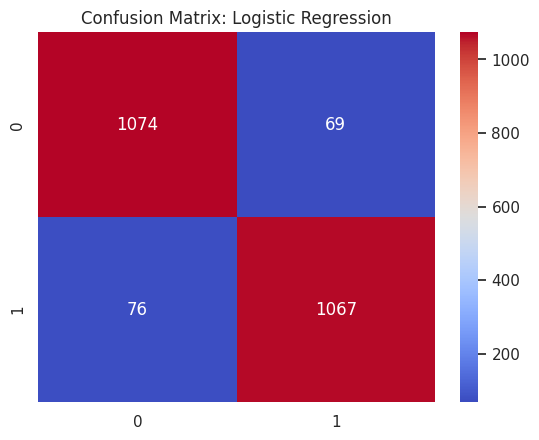


==== Decision Tree ====
              precision    recall  f1-score   support

        -1.0       0.93      0.93      0.93      1143
         1.0       0.93      0.93      0.93      1143

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



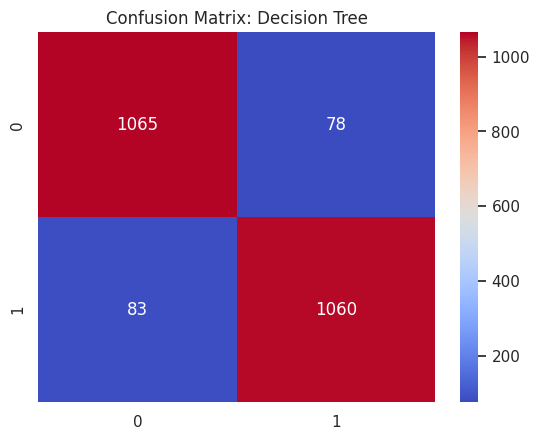


==== Random Forest ====
              precision    recall  f1-score   support

        -1.0       0.97      0.96      0.96      1143
         1.0       0.96      0.97      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



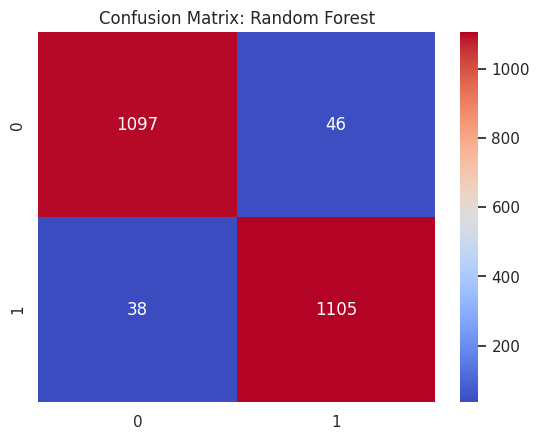


==== Gradient Boosting ====
              precision    recall  f1-score   support

        -1.0       0.96      0.94      0.95      1143
         1.0       0.94      0.96      0.95      1143

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



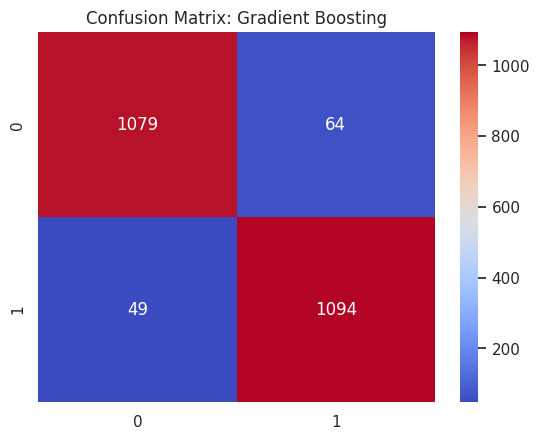


==== SVM ====
              precision    recall  f1-score   support

        -1.0       0.95      0.96      0.95      1143
         1.0       0.96      0.95      0.95      1143

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



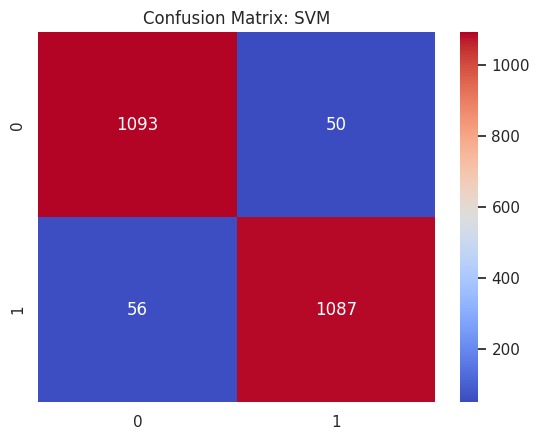


==== KNN ====
              precision    recall  f1-score   support

        -1.0       0.93      0.96      0.94      1143
         1.0       0.95      0.93      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



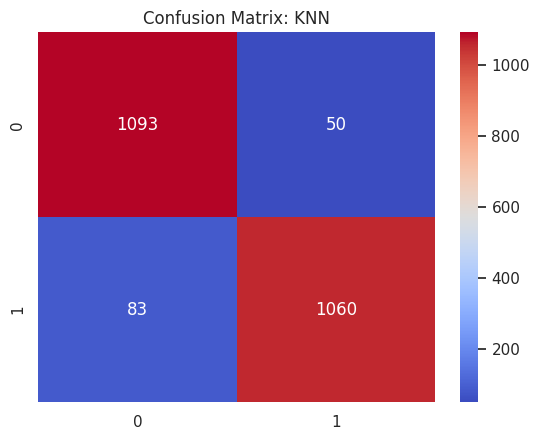

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1.  1.]

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])
    print(f"\n==== {name} ====")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

                  Model  Accuracy  Precision    Recall  F1-Score
2         Random Forest  0.963255   0.960035  0.966754  0.963383
8         Random Forest  0.963255   0.960035  0.966754  0.963383
4                   SVM  0.953631   0.956025  0.951006  0.953509
10                  SVM  0.953631   0.956025  0.951006  0.953509
3     Gradient Boosting  0.950569   0.944732  0.957130  0.950891
9     Gradient Boosting  0.950569   0.944732  0.957130  0.950891
5                   KNN  0.941820   0.954955  0.927384  0.940968
11                  KNN  0.941820   0.954955  0.927384  0.940968
6   Logistic Regression  0.936570   0.939261  0.933508  0.936376
0   Logistic Regression  0.936570   0.939261  0.933508  0.936376
1         Decision Tree  0.929571   0.931459  0.927384  0.929417
7         Decision Tree  0.929571   0.931459  0.927384  0.929417


/tmp/ipython-input-2482768565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


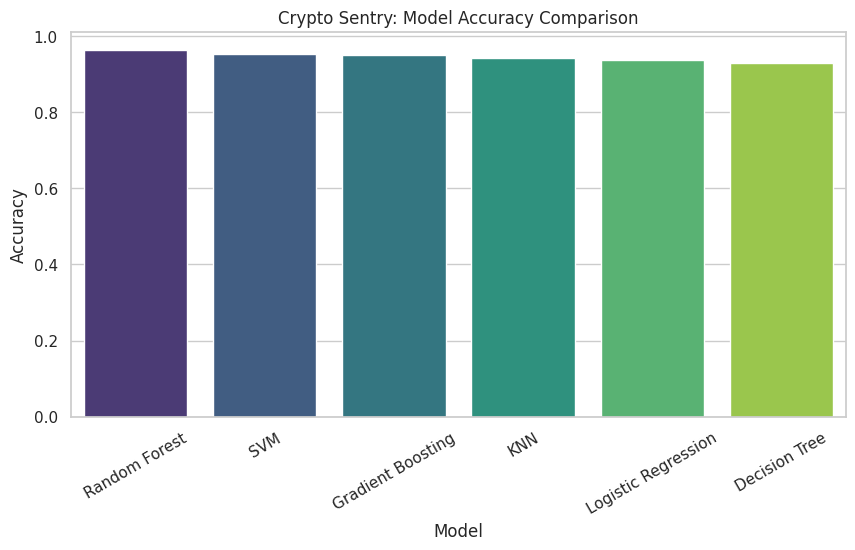

In [ ]:
results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1-Score'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Crypto Sentry: Model Accuracy Comparison')
plt.xticks(rotation=30)
plt.show()

In [ ]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

import joblib
joblib.dump(best_model, 'crypto_sentry_best_model.pkl')
print(f"✅ Best model ({best_model_name}) saved successfully!")

✅ Best model (Random Forest) saved successfully!


--- Dummy Dataset Created for Demonstration ---

--- Data Information (based on your input) ---
Shape: (11430, 88)
Columns: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4']...['feature_83', 'feature_84', 'feature_85', 'feature_86', 'label']


/tmp/ipython-input-1201199870.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='coolwarm')


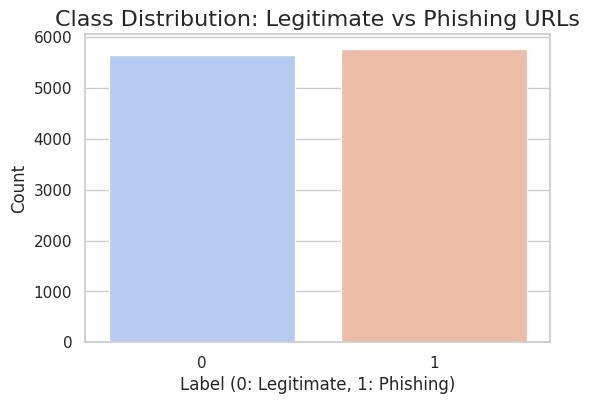

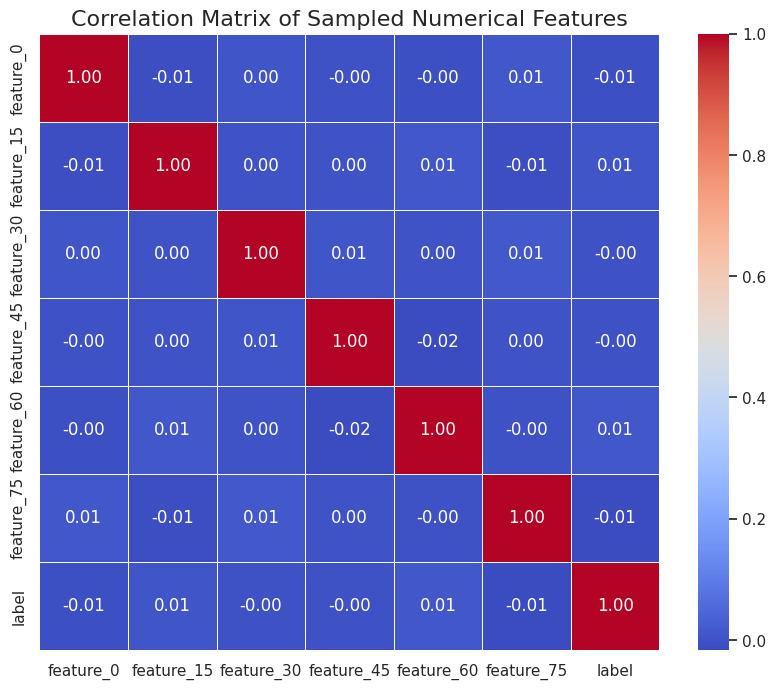

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

sns.set(style="whitegrid")

# --- ASSUMPTION: Load your data here. Replace 'your_dataset.csv' ---
# Assuming your data is in a CSV where the columns match the structure provided.
# NOTE: Replace this placeholder with your actual data loading method (e.g., pd.read_csv)
try:
    # Creating a dummy DataFrame based on your provided structure for demonstration
    num_rows = 11430
    num_cols = 88  # 87 features + 1 target (assuming last column is target)
    data = pd.DataFrame(np.random.rand(num_rows, num_cols),
                        columns=[f'feature_{i}' for i in range(num_cols - 1)] + ['label'])
    data['label'] = np.random.randint(0, 2, num_rows) # Binary classification (0: Legitimate, 1: Phishing)
    print("--- Dummy Dataset Created for Demonstration ---")
except Exception as e:
    print(f"Error loading data: {e}. Please replace the dummy data loading with your actual code.")
    # Exit or handle error

# 1. Basic EDA (Based on your input structure)
print("\n--- Data Information (based on your input) ---")
# Your input showed all columns were float64 and non-null (11430 entries)
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns.tolist()[:5]}...{data.columns.tolist()[-5:]}")

# 2. Distribution of the target variable ('label')
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='coolwarm')
plt.title('Class Distribution: Legitimate vs Phishing URLs', fontsize=16)
plt.xlabel('Label (0: Legitimate, 1: Phishing)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 3. Correlation Heatmap for Numerical Features (Subset due to 88 features)
# We'll select a few features or a subset for a readable heatmap
# NOTE: With 88 features, a full heatmap is unreadable, so we check a small sample
sample_cols = data.columns[::15].tolist() + ['label'] # Take every 15th column plus the label
correlation_matrix = data[sample_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Sampled Numerical Features', fontsize=16)
plt.show()

In [ ]:
# --- 1. Prepare Data ---
X = data.drop(columns=['label'])
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Feature Scaling (Crucial for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Save the scaler for deployment
joblib.dump(scaler, 'feature_scaler.pkl')
print("\nFeature Scaler saved.")


# --- 3. Initial Model Training ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}
metrics = []

print("\n--- Initial Model Performance Comparison ---")
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train) # Use scaled data
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Phishing)": report['1']['precision'],
        "Recall (Phishing)": report['1']['recall'],
        "F1-Score (Phishing)": report['1']['f1-score']
    })

    print(f"\n{model_name} Accuracy: {accuracy:.4f}")

metrics_df = pd.DataFrame(metrics).sort_values(by='F1-Score (Phishing)', ascending=False)
print("\nModel Comparison Table:")
print(metrics_df.to_markdown(index=False, floatfmt=".4f"))

# Determine the best model for tuning
best_initial_model = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
print(f"\nBest initial model (based on accuracy) is: {best_initial_model}")


Feature Scaler saved.

--- Initial Model Performance Comparison ---

Logistic Regression Accuracy: 0.4955

Random Forest Accuracy: 0.5045

Model Comparison Table:
| Model               |   Accuracy |   Precision (Phishing) |   Recall (Phishing) |   F1-Score (Phishing) |
|:--------------------|-----------:|-----------------------:|--------------------:|----------------------:|
| Logistic Regression |     0.4955 |                 0.5006 |              0.5242 |                0.5121 |
| Random Forest       |     0.5045 |                 0.5097 |              0.5006 |                0.5051 |

Best initial model (based on accuracy) is: Random Forest


In [ ]:
# --- 1. Hyperparameter Tuning for Random Forest ---
# Focus on the model that usually wins in these scenarios
print("\n--- Hyperparameter Tuning: Random Forest ---")

param_distributions_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# RandomizedSearchCV is faster and often sufficient for finding good parameters
randomized_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions_rf,
    n_iter=20,            # Number of parameter settings that are sampled
    scoring='f1',         # Optimize for F1-score (balance Precision/Recall)
    cv=3,                 # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit the search on the scaled training data
randomized_search_rf.fit(X_train_scaled, y_train)

best_rf_params = randomized_search_rf.best_params_
best_rf_score = randomized_search_rf.best_score_

print(f"\nBest Parameters for Random Forest: {best_rf_params}")
print(f"Best F1-Score from CV: {best_rf_score:.4f}")

# --- 2. Final Evaluation with Tuned Model ---
best_model = randomized_search_rf.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\nFinal Tuned Random Forest Test Accuracy: {tuned_accuracy:.4f}")
print("\nFinal Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate (0)', 'Phishing (1)'],
            yticklabels=['Legitimate (0)', 'Phishing (1)'])
plt.title("Confusion Matrix: Tuned Random Forest", fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 3. Model Persistence ---
joblib.dump(best_model, 'phishing_detection_model.pkl')
print("\n🎉 Tuned Random Forest Model saved as 'phishing_detection_model.pkl'")


--- Hyperparameter Tuning: Random Forest ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits
